In [49]:
import msprime
import numpy as np
import pandas as pd
from IPython.display import display,SVG

msprime.__version__

'0.7.3'

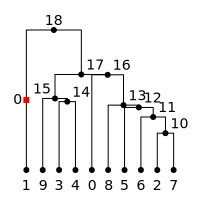

In [166]:
N_e = 10000
N_e_Anc = 1000
t_exp = 1000

pop0 = msprime.PopulationConfiguration(sample_size=10, initial_size=N_e)
size_change = msprime.PopulationParametersChange(time=t_exp, initial_size=N_e_Anc, population=0)

afs = []
for i in range(10):
    for x in range(1000):
        tree_sequence = msprime.simulate(population_configurations=[pop0], demographic_events=[size_change],\
                                     Ne=10000, length=10e3,\
                                     mutation_rate=1e-8, recombination_rate=0)
        afs.append(tree_sequence.allele_frequency_spectrum(span_normalise=False, polarised=True))
tree = tree_sequence.first()
SVG(tree.draw())

In [162]:
tree_sequence.allele_frequency_spectrum(span_normalise=False, polarised=True)

array([  0., 946., 353., 110., 102.,  22.,  37.,  39.,  47.,  50.,   0.])

In [165]:
np.sum(afs, axis=0)

array([   0., 1170.,  246.,  158.,   88.,   93.,   57.,   61.,   58.,
         38.,    0.])

In [168]:
import h5py
nrows = 10000
maxlen = 0
optim = 5000
with h5py.File("/tmp/watdo.hdf5", 'w') as ioh5:
    dcat = ioh5.create_dataset(
        name="catg",
        shape=(nrows, maxlen, 4),
        dtype=np.uint32,
        chunks=(optim, maxlen, 4),
        compression="gzip")

ValueError: All chunk dimensions must be positive (all chunk dimensions must be positive)